# RCNN-Implementation using Keras and OpenCV

1. Use OpenCVs Selective Search to get 2000 region proposals
1. Use Kerase to build a CNN as the feature extractor (4096-D feature vector)

comparable to https://www.pyimagesearch.com/2020/07/13/r-cnn-object-detection-with-keras-tensorflow-and-deep-learning/ (without the fine-tuning part)

In [1]:
import numpy as np
import pandas as pd
import os,cv2,keras
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

In [2]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [13]:
train_images=[]
train_labels=[]
annotations = Path('./Airplanes_Annotations')
path = Path('./Airplane_images')
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [3]:
for num,i in enumerate(os.listdir(annotations)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(num,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annotations,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag = 1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as exc:
        print(exc)
        print("error in "+filename)
        continue

1 airplane_489.jpg
inside
2 airplane_304.jpg
inside
3 airplane_462.jpg
inside
4 airplane_476.jpg
inside
5 airplane_310.jpg
6 airplane_338.jpg
inside
7 airplane_660.jpg
8 airplane_106.jpg
inside
9 airplane_112.jpg
inside
10 airplane_674.jpg
11 airplane_648.jpg
inside
12 airplane_099.jpg
13 airplane_072.jpg
inside
14 airplane_066.jpg
inside
15 airplane_700.jpg
inside
17 airplane_270.jpg
inside
18 airplane_516.jpg
19 airplane_502.jpg
20 airplane_264.jpg
inside
21 airplane_258.jpg
inside
22 airplane_259.jpg
inside
23 airplane_503.jpg
24 airplane_265.jpg
inside
25 airplane_271.jpg
inside
26 airplane_517.jpg
28 airplane_067.jpg
inside
29 airplane_073.jpg
inside
30 airplane_098.jpg
31 airplane_649.jpg
32 airplane_113.jpg
33 airplane_675.jpg
34 airplane_661.jpg
35 airplane_107.jpg
inside
36 airplane_339.jpg
37 airplane_477.jpg
inside
38 airplane_311.jpg
inside
39 airplane_305.jpg
inside
40 airplane_463.jpg
41 airplane_488.jpg
inside
43 airplane_313.jpg
inside
44 airplane_475.jpg
45 airplane_46

inside
355 airplane_541.jpg
inside
356 airplane_555.jpg
inside
357 airplane_233.jpg
358 airplane_582.jpg
359 airplane_596.jpg
inside
360 airplane_019.jpg
362 airplane_025.jpg
inside
363 airplane_031.jpg
inside
365 airplane_179.jpg
inside
366 airplane_637.jpg
inside
367 airplane_151.jpg
inside
368 airplane_145.jpg
inside
369 airplane_623.jpg
inside
370 airplane_192.jpg
inside
371 airplane_186.jpg
inside
372 airplane_409.jpg
inside
373 airplane_353.jpg
inside
374 airplane_435.jpg
375 airplane_421.jpg
inside
376 airplane_347.jpg
inside
377 airplane_390.jpg
inside
378 airplane_384.jpg
inside
379 airplane_392.jpg
inside
380 airplane_386.jpg
inside
381 airplane_437.jpg
inside
382 airplane_351.jpg
383 airplane_345.jpg
inside
384 airplane_423.jpg
inside
385 airplane_379.jpg
inside
386 airplane_190.jpg
inside
387 airplane_184.jpg
388 airplane_153.jpg
inside
389 airplane_635.jpg
inside
390 airplane_621.jpg
inside
391 airplane_147.jpg
393 airplane_609.jpg
inside
394 airplane_027.jpg
395 airplane_

inside
692 airplane_644.jpg
inside
693 airplane_650.jpg
inside
694 airplane_136.jpg
inside
695 airplane_095.jpg
inside
696 airplane_081.jpg
inside
697 airplane_056.jpg
698 airplane_042.jpg
inside
699 airplane_297.jpg
inside
700 airplane_283.jpg
inside
702 airplane_268.jpg
703 airplane_532.jpg
704 airplane_254.jpg
inside
705 airplane_240.jpg
inside
706 airplane_526.jpg
inside
707 airplane_241.jpg
inside
708 airplane_527.jpg
inside
709 airplane_533.jpg
inside
710 airplane_255.jpg
inside
711 airplane_269.jpg
712 airplane_282.jpg
714 airplane_296.jpg
inside
715 airplane_043.jpg
inside
716 airplane_057.jpg
inside
717 airplane_080.jpg
inside
718 airplane_094.jpg
719 airplane_651.jpg
720 airplane_137.jpg
inside
721 airplane_123.jpg
inside
722 airplane_645.jpg
inside
723 airplane_679.jpg
724 airplane_692.jpg
725 airplane_686.jpg
inside
726 airplane_335.jpg
inside
727 airplane_453.jpg
728 airplane_447.jpg
inside
729 airplane_321.jpg
inside
730 airplane_309.jpg
inside
731 airplane_490.jpg
inside

In [5]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [6]:
np.save("train_images", X_new)
np.save("train_labels", y_new)

In [3]:
X_new = np.load("train_images.npy")
y_new = np.load("train_labels.npy")

In [4]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

In [5]:
vggmodel = VGG16(weights='imagenet', include_top=True)

for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
last = vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(last)
model_final = Model(vggmodel.input,predictions)
opt = Adam(lr=0.0001)
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

class OHELabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)
lenc = OHELabelBinarizer()
Y =  lenc.fit_transform(y_new)
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.1)

In [8]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)

traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

BS = 10
checkpoint = ModelCheckpoint("rcnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
# hist = model_final.fit_generator(generator=traindata, steps_per_epoch= 10, epochs= 35, validation_data=testdata, validation_steps=2, callbacks=[checkpoint,early])
hist = model_final.fit(x=trdata.flow(x=X_train, y=y_train, batch_size=BS), steps_per_epoch=len(X_train) // BS, epochs= 35, validation_data=(X_test, y_test), callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/35
10/10 [==============================] - 111s 11s/step - loss: 1.2896 - accuracy: 0.6938 - val_loss: 0.5464 - val_accuracy: 0.7188
Epoch 2/35
10/10 [==============================] - 97s 10s/step - loss: 0.4010 - accuracy: 0.8531 - val_loss: 0.3070 - val_accuracy: 0.8438
Epoch 3/35
10/10 [==============================] - 95s 9s/step - loss: 0.3033 - accuracy: 0.8844 - val_loss: 0.2895 - val_accuracy: 0.9062
Epoch 4/35
10/10 [==============================] - 96s 10s/step - loss: 0.2805 - accuracy: 0.9031 - val_loss: 0.2978 - val_accuracy: 0.9219
Epoch 5/35
10/10 [==============================] - 97s 10s/step - loss: 0.2704 - accuracy: 0.9062 - val_loss: 0.2341 - val_accuracy: 0.9062
Epoch 6/35
10/10 [==============================] - 103s 10s/step - loss: 0.3761 - accuracy: 0.8938 - val_loss: 0.2388 - val_accuracy: 0.8594
Epoch 7/35
10/10 [==============================] - 110s 11s/step - loss: 0.2

In [11]:
from keras.models import load_model
saved_model = load_model('rcnn_vgg16_1.h5')

112.23937773704529


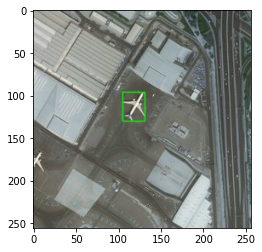

In [20]:
from time import time

z = 0
for ind, i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        start = time()
        for pos, result in enumerate(ssresults):
            if pos < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out = model_final.predict(img)
                if out[0][0] > 0.70:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        print(time() - start)
        plt.figure()
        plt.imshow(imout)
        if z > 5:
            break

In [ ]:
from sklearn.metrics import classification_report

predictions = model_final.predict(x=X_test.astype("float32"), batch_size=BS)

In [30]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1698
           1       0.91      0.94      0.93      2086

    accuracy                           0.92      3784
   macro avg       0.92      0.91      0.91      3784
weighted avg       0.92      0.92      0.92      3784



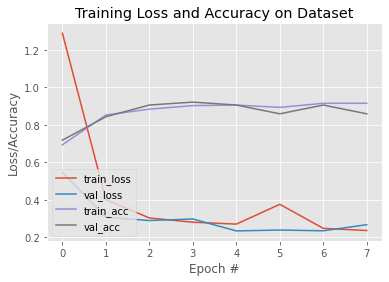

In [22]:
N = np.arange(0, 8)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.plot(N, hist.history["accuracy"], label="train_acc")
plt.plot(N, hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()